In [1]:
pip install opencv-python

You should consider upgrading via the '/Users/yeshugamit/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [105]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random # for visualization
print('Libraries Imported')

Libraries Imported


In [106]:
#imgs_path='C:\\Users\\ganpa\\OneDrive\\Desktop\\Minor Project\\Processed MIAS\\'
imgs_path='/Users/yeshugamit/Documents/SEM 7/MP/Processed MIAS/'
#(1024, 1024, 3)

In [107]:
from PIL import Image
import glob
x= []
#for filename in sorted(glob.glob("C:\\Users\\ganpa\\OneDrive\\Desktop\\Minor Project\\Processed MIAS\\*.png")): 
for filename in sorted(glob.glob("/Users/yeshugamit/Documents/SEM 7/MP/Processed MIAS/*.png")):
    img=cv2.imread(filename)
   # print(img.shape)
    img =cv2.resize(img,(224, 224))
    x.append(img)

In [108]:
x[0].shape

(224, 224, 3)

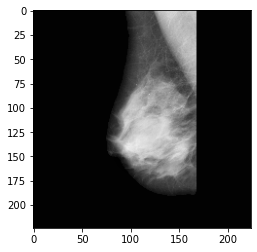

In [109]:
plt.imshow(x[0])

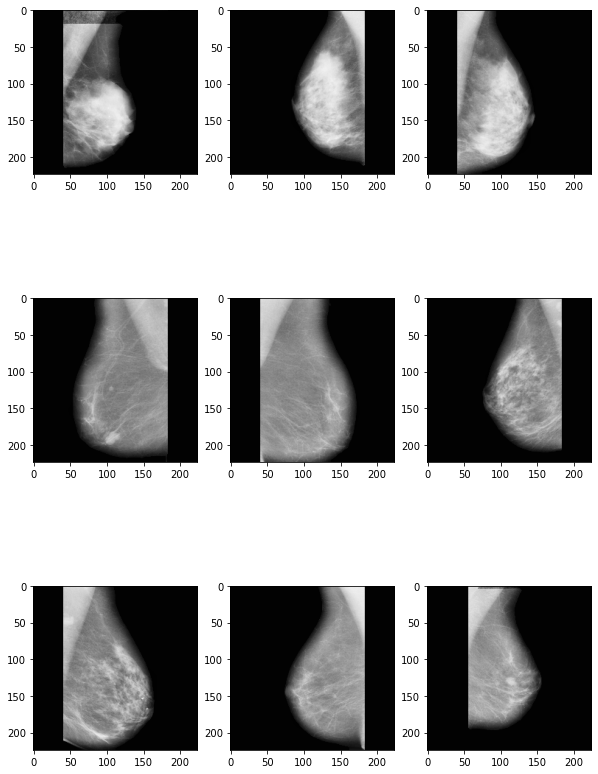

In [110]:
fig=plt.figure(figsize=(10,15))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = np.random.randint(10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(x[i])
plt.show()

In [111]:
header_list = ["REFNUM", "BG", "CLASS", "SEVERITY", "X", "Y", " RADIUS"]
#index	REFNUM	BG	CLASS	SEVERITY	X	Y	RADIUS

In [112]:
path='/Users/yeshugamit/Documents/SEM 7/MP/MIAS Annotations.csv'
info=pd.read_csv(path,names=header_list)

In [113]:
info.head()

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb001,G,CIRC,B,535,425,197.0
3,mdb002,G,CIRC,B,522,280,69.0
4,mdb003,D,NORM,NaN,NaN,NaN,NaN


In [114]:
list(info)

['REFNUM', 'BG', 'CLASS', 'SEVERITY', 'X', 'Y', ' RADIUS']

In [115]:
info['SEVERITY'].fillna(0)

0      B
1      B
2      B
3      B
4      0
      ..
327    0
328    0
329    0
330    0
331    0
Name: SEVERITY, Length: 332, dtype: object

In [116]:
info.shape

(332, 7)

In [117]:
info.isnull().sum()

REFNUM        0
BG            0
CLASS         0
SEVERITY    209
X           210
Y           210
 RADIUS     213
dtype: int64

In [118]:
info.dtypes

REFNUM       object
BG           object
CLASS        object
SEVERITY     object
X            object
Y            object
 RADIUS     float64
dtype: object

In [119]:
info['SEVERITY'].value_counts()

B    69
M    54
Name: SEVERITY, dtype: int64

In [120]:
info['BG'].value_counts()

D    117
F    109
G    106
Name: BG, dtype: int64

In [121]:
info['CLASS'].value_counts()

NORM    209
CALC     28
CIRC     27
SPIC     19
ARCH     19
ASYM     15
MISC     15
Name: CLASS, dtype: int64

In [122]:
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]

In [123]:
# Turning our outputs Normal-Abnormal to 0-1
label = []
for i in range(len(info)):
    if info.CLASS[i] != 'NORM':
        label.append(1)
    else:
        label.append(0)
label = np.array(label)
print(f"Imagenes: {len(label)}, Normales = {len(label)-np.sum(label)}, No normales= {np.sum(label)}")

Imagenes: 332, Normales = 209, No normales= 123


In [124]:
# define the every images filepaths in to list
img_name = []
for i in range(len(label)):
        img_name.append(imgs_path + info.REFNUM[i]+ '.png')

In [125]:
count = 0
remove = True
temp_label = []
temp_img_name = []

for i, lbl in enumerate(label.tolist()):
    if lbl == 0 and remove == True:
        count = count + 1
        if count >= 84:
            remove = False
    else:
        temp_label.append(lbl)
        temp_img_name.append(img_name[i])

In [126]:
label = np.array(temp_label)
img_name = temp_img_name

In [127]:
img_name = np.array(img_name)

In [128]:
#print(img_name)
print(f'image addres amount {img_name.shape}')

image addres amount (248,)


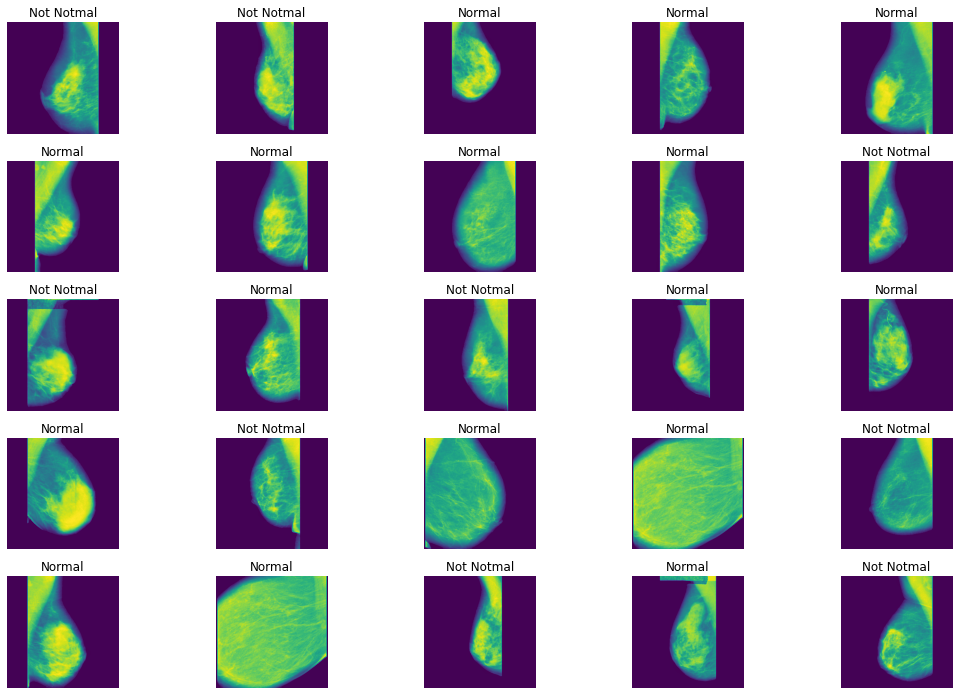

In [129]:
#view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('Not Notmal')
        else:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [130]:
img_path = []
last_label = []
IMG_SIZE = 224

for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    rows, cols= img.shape
    for angle in range(180):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle*2, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (IMG_SIZE, IMG_SIZE))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [131]:
img_path = np.array(img_path)
last_label = np.array(last_label)
img_path.shape

(44640, 224, 224)

In [132]:
img_path = img_path.reshape((-1,IMG_SIZE,IMG_SIZE,1))
img_path.shape

(44640, 224, 224, 1)

In [133]:
last_label.shape

(44640,)

In [134]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [135]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35712, 8928, 35712, 8928)

In [50]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [136]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from tqdm.notebook import tqdm
import cv2
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.activations import *
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from time import time

In [137]:
reg = tf.keras.regularizers.L2(l2=1e-5)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)


model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(64, 
                kernel_initializer = ini,
                activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
dense_17 (Dense)             (None, 54, 54, 64)       

In [139]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [140]:
train = True
if train:
    epochs=3
    history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128,
                 callbacks=[early_stop, model_check_point])
else:
    model = tf.keras.models.load_model('./')

Epoch 1/3
224/224 [==============================] - 1669s 7s/step - loss: 0.6944 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5013

Epoch 00001: val_loss improved from inf to 0.69314, saving model to ./
INFO:tensorflow:Assets written to: ./assets
Epoch 2/3
224/224 [==============================] - 1693s 8s/step - loss: 0.6932 - accuracy: 0.5042 - val_loss: 0.6932 - val_accuracy: 0.5013

Epoch 00002: val_loss did not improve from 0.69314
Epoch 3/3
224/224 [==============================] - 1651s 7s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5013

Epoch 00003: val_loss did not improve from 0.69314


The results was: False       And the probability being: 0.4946572482585907
Real value was: True
Test id: 3605


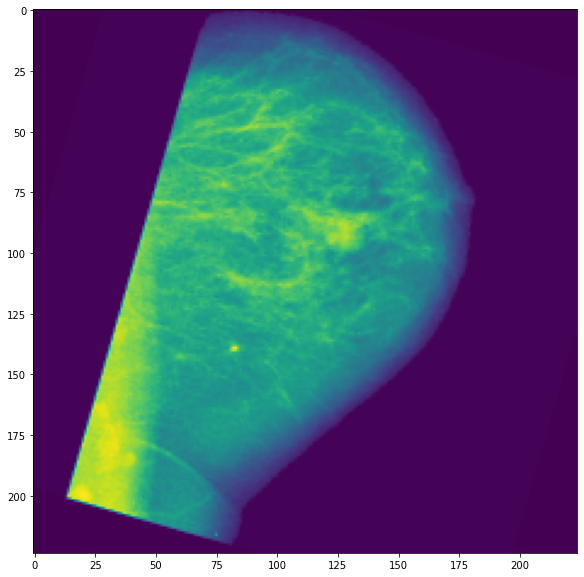

In [141]:
from random import randint
test_num = randint(0,len(x_test))
#test_num = 274
result = model.predict(np.array([x_test[test_num]]))

plt.figure(figsize= (10,10))
plt.imshow(x_test[test_num])

print(f"The results was: {result[0][0]>= 0.5}       And the probability being: {result[0][0]}\nReal value was: {y_test[test_num]>=0.5}")
print(f"Test id: {test_num}")

In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

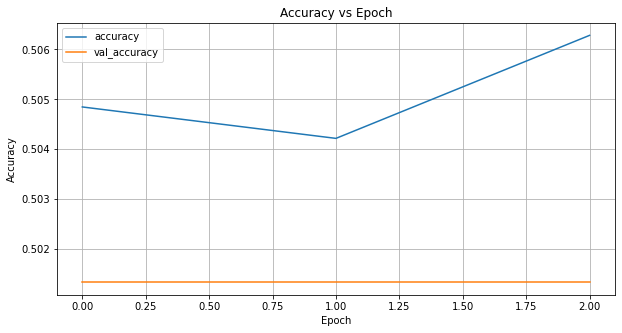

In [143]:
plt.figure(figsize=(10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= "accuracy")
plt.plot(range(0,len(history.history['val_accuracy'])),history.history['val_accuracy'], label= "val_accuracy")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.show()

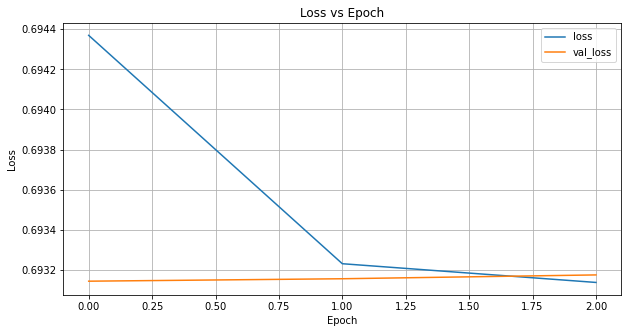

In [144]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(history.history['loss'])),history.history['loss'], label= "loss")
plt.plot(range(0,len(history.history['val_loss'])),history.history['val_loss'], label= "val_loss")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

In [145]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

279/279 - 114s - loss: 0.6932 - accuracy: 0.5015

Test accuracy: 0.501456081867218


In [146]:
len(x_test)

8928

In [147]:
save_model = True
if save_model:
    save_model_path = "./Ian_save/"
    model.save("pretrained_model.h5")

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from sklearn import metrics
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

rows, cols,color = x_train[0].shape
print(x_train[0].shape)

base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.2)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x =  Dropout(0.5)(x)
predictions = Dense(16, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
#test_features=model_feat.predict(x_test)